In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Load

In [ ]:
df = pd.read_csv('50_Startups.csv')
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


- R&D Spend, Administration, Marketing Spend 정보를 이용하여 Profit 예측

In [ ]:
startups = df.values
print(startups.shape)

(50, 5)


# 2. X와 y 분리

In [ ]:
X = startups[:, :3]
y = startups[:, -1]

In [ ]:
print(X.shape, y.shape)

(50, 3) (50,)


# 3. Training data와 Test data 분리

In [ ]:
from sklearn.model_selection import train_test_split

# X의 행의 수: sample의 수(training과 test의 sample 수는 다름(동일할 수도 있음))
# X의 열의 수: 특징의 수(R&D Spend, Administration, Marketing Spend), (training과 test의 특징 수는 반드시 동일해야 함)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4. Linear regression 학습

In [ ]:
from sklearn.linear_model import LinearRegression

# profit을 예측하기 위한 LinearRegression model 생성
lr = LinearRegression()

# training data를 통해 model을 학습 후 model 생성 완료
lr.fit(X_train, y_train)

LinearRegression()

# 5. Prediction(X_test 값을 model의 입력으로 하여 Profit 값 예측하기)

In [ ]:
# X_test.shape = (13, 3)
# X_test는 R&D Spend, Administration, Marketing Spend 3개의 특징을 가진 13개의 sample data(X)
# pred: 13개 Sample data에 대한 예측값
# pred와 y_test를 비교하여 성능을 평가할 수 있음
pred = lr.predict(X_test)

print(pred.shape)
print(pred)

(13,)
[126432.21354192  85502.50398527  99003.12574173  46163.70173114
 128645.99157053  52188.50492673 108562.55837568 100459.7619706
  97565.18114776 112618.38433624 128589.18988353 174378.83280484
  93459.27699416]


# 6. Regression model 성능 평가하기

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

# MSE와 MAE는 다른 model과 성능을 비교할 때는 좋은 척도이나, 단독으로 model을 평가하기는 애매함
# R2는 주로 0보다 크고, 1보다 작거나 같은 값이므로 classitication에서 accuracy와 유사한 정보로, 단독으로 model을 평가하기 좋음
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

MSE: 86644383.23852435
MAE: 7432.7855845989125
R2: 0.9193827032400599


# 7. 결과 시각화

- y_test와 pred 한 번에 시각화하기

Text(0.5, 1.0, 'Linear Regression')

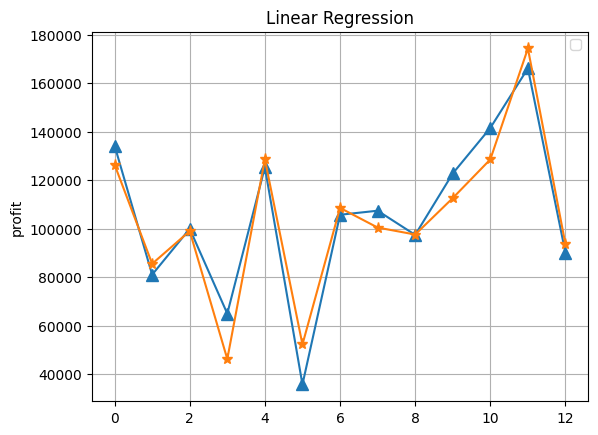

In [ ]:
plt.plot(y_test, marker='^', markersize=8) # 정답, target, actual value
plt.plot(pred, marker='*', markersize=8) # 예측값, prediction
plt.legend()
plt.grid()
plt.ylabel('profit')
plt.title('Linear Regression')